In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="72UmupjryQ9D32WFetjY")
project = rf.workspace("protecting-earth").project("garbage-classification-xcqkc")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to garbage-classification-1 in yolov5pytorch:: 100%|█| 3010/3010 [00:04<00:00, 657.00it/


In [2]:
from IPython.display import Image

In [5]:
! pip install torch
! pip install utils

In [8]:
! pip3 install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio===0.9.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Ananconda3\\Lib\\site-packages\\~orch\\lib\\asmjit.dll'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 3.1/3.1 GB 628.5 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 216.0/216.0 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0


In [10]:
# Yolov5 github 레포지토리 clone
!git clone https://github.com/ultralytics/yolov5.git

# 필요한 모듈 설치
!pip install -U -r yolov5/requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Ananconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 167, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Ananconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 247, in wrapper
    return func(self, options, args)
  File "C:\Ananconda3\lib\site-packages\pip\_internal\commands\install.py", line 335, in run
    reqs = self.get_requirements(args, options, finder, session)
  File "C:\Ananconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 433, in get_requirements
    for parsed_req in parse_requirements(
  File "C:\Ananconda3\lib\site-packages\pip\_internal\req\req_file.py", line 145, in parse_requirements
    for parsed_line in parser.parse(filename, constraint):
  File "C:\Ananconda3\lib\site-packages\pip\_internal\req\req_file.py", line 328, in parse
    yield from self._parse_and_recurse

In [5]:
import os
os.chdir('/kaggle/working')

In [7]:
# Train YOLOv5s on COCO128 for 3 epochs
!python /kaggle/working/yolov5/train.py --img 640 --batch 16 --epochs 60 --data /kaggle/working/yolov5/data/coco128.yaml --weights yolov5x.pt --cache

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5x.pt, cfg=, data=/kaggle/working/yolov5/data/coco128.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters

In [11]:
!python /kaggle/working/yolov5/detect.py --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.35 --source /kaggle/working/datasets/coco128/images/train2017/000000000009.jpg

detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/working/datasets/coco128/images/train2017/000000000009.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 322 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
image 1/1 /kaggle/working/datasets/coco128/images/train2017/000000000009.jpg: 480x640 3 bowls, 4 oranges, 1 broccoli, 38.1ms
Speed: 0.5ms pre-process, 38.1ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp3

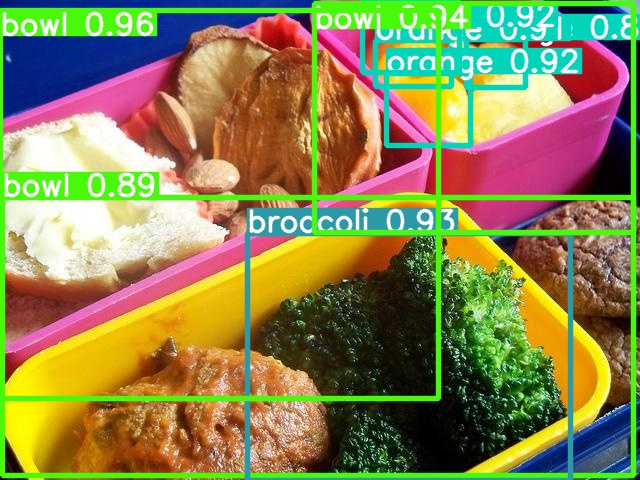

In [13]:
Image('/kaggle/working/yolov5/runs/detect/exp3/000000000009.jpg')

In [15]:
!python /kaggle/working/yolov5/detect.py --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.35 --source /kaggle/working/garbage-classification-1/test/images

detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/working/garbage-classification-1/test/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 322 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
image 1/150 /kaggle/working/garbage-classification-1/test/images/000000_JPG.rf.6c421d17f97533dd996e5ea9772da6f1.jpg: 640x640 (no detections), 38.4ms
image 2/150 /kaggle/working/garbage-classification-1/test/images/000000_jpg.rf.8ff1647cda60de611aa332a01b179428.jpg: 640

In [17]:
! python /kaggle/working/yolov5/detect.py --source 0

detect: weights=yolov5/yolov5s.pt, source=1, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

[ WARN:0] global /tmp/pip-req-build-jpmv6t9_/opencv/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video1): can't open camera by index
Traceback (most recent call last):
  File "/kaggle/working/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/kaggle/working/yolov5/detec

In [19]:
!python /kaggle/working/yolov5/detect.py --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.35 --source /kaggle/input/simple-garbage/.mp4

detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/input/simple-garbage/.mp4, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 322 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
video 1/1 (1/124) /kaggle/input/simple-garbage/.mp4: 384x640 1 bottle, 1 laptop, 1 book, 26.7ms
video 1/1 (2/124) /kaggle/input/simple-garbage/.mp4: 384x640 1 bottle, 1 laptop, 1 book, 27.0ms
video 1/1 (3/124) /kaggle/input/simple-garbage/.mp4: 384x640 1 bottle, 1 laptop, 26.6ms
video 1/

In [28]:
Image('/kaggle/working/yolov5/runs/detect/exp9/.mp4.mp4')

ValueError: Cannot embed the 'mp4' image format

In [27]:
os.listdir('/kaggle/working/yolov5/runs/detect/exp9')

['.mp4.mp4']

In [32]:
import cv2

capture = cv2.VideoCapture('/kaggle/working/yolov5/runs/detect/exp9/.mp4.mp4')

while capture.isOpened():
    run, frame = capture.read()
    if not run:
        print("[프레임 수신 불가] - 종료합니다")
        break
    img = cv2.cvtColor(frame, cv2.IMREAD_COLOR)
    cv2.imshow('video', frame)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/highgui/src/window.cpp:1274: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


ERROR: Could not find a version that satisfies the requirement pkg-config (from versions: none)
ERROR: No matching distribution found for pkg-config
